<a href="https://colab.research.google.com/github/ZohaEmaan01/ML-Models/blob/main/NaiveBayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#importing the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dataset = pd.read_csv(url)
print(dataset.head())

dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
X = dataset.iloc[:, [2,4]]  # Features
y = dataset.iloc[:, 1]       # Target variable

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#scaling features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#applying naive bayes classifier on training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predicting the results
y_pred = classifier.predict(X_test)

Confusion Matrix: 

[[115  24]
 [ 25  59]]

Precision: 0.7108433734939759

Recall: 0.7023809523809523

F1 Score: 0.7065868263473053

Accuracy: 0.7802690582959642

ROC Curve: 


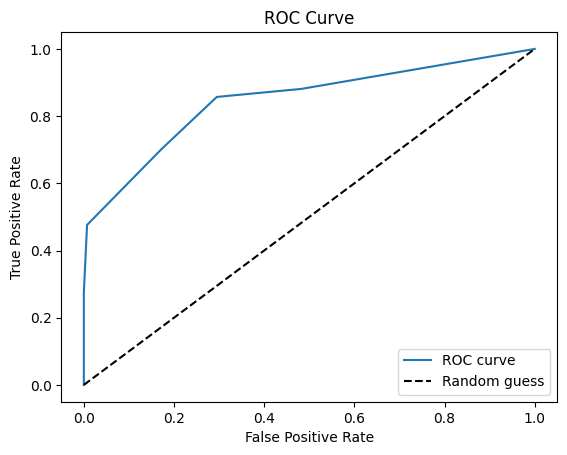

In [ ]:
#evaluating using evaluation measures precision, recall, f1, accuracy, ROC curve

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, accuracy_score, confusion_matrix

print('Confusion Matrix: ')
print()
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Precision: {precision}")
print()
print(f"Recall: {recall}")
print()
print(f"F1 Score: {f1}")
print()
print(f"Accuracy: {accuracy}")
print()

print('ROC Curve: ')
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()